In [1]:
print("Hello World")

Hello World


Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

load the data provided

In [286]:
purchase = pd.read_csv("purchase.csv")
browse = pd.read_csv("browse.csv")
skv = pd.read_csv("sku.csv")
userid = pd.read_csv("userid.csv")

In [6]:
purchase.head()

,User Id,Date,SKU
0,311DBC84,10/11/2017,178394
1,2B1F305E,10/1/2017,214049
2,5429C2C,10/9/2017,178735
3,284FACC4,10/28/2017,217190
4,28CC59,8/11/2017,141740


In [7]:
browse.head()

,User ID,Date,SKU
0,264BCFBA,12/24/2017,302445
1,570B6CA,12/10/2017,135119
2,237446F5,11/10/2017,135119
3,1388A512,12/10/2017,141244
4,16457B5F,11/22/2017,181450


In [8]:
skv.head(3)

,SKU,Description,Category Description
0,122451.0,CURVE BOW GLOVE A4,Handbags & Access
1,124549.0,PIPED DRIVING GLO F0,Handbags & Access
2,126412.0,SIDE BOW GLOVE Y0,Handbags & Access


In [9]:
userid.head(3)

,User id,Age
0,CF96A4F,25
1,2A95F376,49
2,2C68D6D0,47


In [10]:
purchase.shape

(3607, 3)

In [11]:
browse.shape

(5826, 3)

In [12]:
skv.shape

(256, 3)

In [13]:
userid.shape

(1199, 2)

Merge the data based on user profiles and what have purchased and browsed

In [14]:
purchase_behaviour = pd.merge(purchase, skv, on='SKU')

In [15]:
purchase_behaviour.head(3)

,User Id,Date,SKU,Description,Category Description
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access
1,26C2EE87,12/2/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access
2,26A00E7F,11/29/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access


In [16]:
purchase_behaviour.shape

(3607, 5)

In [17]:
userid['User Id'] = userid['User id']
del userid['User id']

In [18]:
purchase_behaviour = pd.merge(purchase_behaviour, userid, on='User Id')

Now we have complete data at one point, with all user information and his purchase history

In [19]:
purchase_behaviour.head()

,User Id,Date,SKU,Description,Category Description,Age
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48
2,26C2EE87,12/2/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,25
3,26C2EE87,12/10/2017,186796,MIMOSA PRINT BANG N4,Jewellery,25
4,26C2EE87,10/28/2017,135119,PATENT CHARM GLOV Y4,Handbags & Access,25


In [20]:
purchase_behaviour.tail()

,User Id,Date,SKU,Description,Category Description,Age
3602,18028E1D,12/22/2017,172185,BOBBLE SCARF F4,Handbags & Access,24
3603,2A34B4F2,10/7/2017,172185,BOBBLE SCARF F4,Handbags & Access,53
3604,265F7284,8/17/2017,172185,BOBBLE SCARF F4,Handbags & Access,31
3605,1C3B081D,8/22/2017,219484,SPECKLE WOOD BANG R8,Jewellery,25
3606,9C4465D,10/14/2017,219484,SPECKLE WOOD BANG R8,Jewellery,26


In [21]:
#Check for Null Values
purchase_behaviour.apply(lambda x : sum(x.isnull()))

User Id                 0
Date                    0
SKU                     0
Description             0
Category Description    0
Age                     0
dtype: int64

In [22]:
#check for unique/Categorical values in the data
purchase_behaviour.apply(lambda x : len(x.unique()))

User Id                 1137
Date                     153
SKU                       80
Description               80
Category Description       2
Age                       36
dtype: int64

Now merge same with browsing data, bring all browser , product and user information

In [23]:
browse_behaviour = pd.merge(browse, skv, on='SKU')

In [24]:
browse_behaviour.head(3)

,User ID,Date,SKU,Description,Category Description
0,264BCFBA,12/24/2017,302445,COLORADO LRG RC NP,Luggage
1,423BED3,12/3/2017,302445,COLORADO LRG RC NP,Luggage
2,3D37D85,11/24/2017,302445,COLORADO LRG RC NP,Luggage


In [25]:
browse_behaviour['User Id'] = browse_behaviour['User ID']
del browse_behaviour['User ID']

In [26]:
browse_behaviour = pd.merge(browse_behaviour, userid, on='User Id')

In [27]:
browse_behaviour.head(3)

,Date,SKU,Description,Category Description,User Id,Age
0,12/24/2017,302445,COLORADO LRG RC NP,Luggage,264BCFBA,20
1,12/6/2017,303791,SCORPIUS LRG R WL,Luggage,264BCFBA,20
2,11/16/2017,200573,ZIG ZAG BANGLE J4,Jewellery,264BCFBA,20


In [28]:
purchase_behaviour.head(3)

,User Id,Date,SKU,Description,Category Description,Age
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48
2,26C2EE87,12/2/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,25


In [29]:
#Check for Null Values
browse_behaviour.apply(lambda x : sum(x.isnull()))

Date                    0
SKU                     0
Description             0
Category Description    0
User Id                 0
Age                     0
dtype: int64

In [30]:
#check for unique/Categorical values in the data
browse_behaviour.apply(lambda x : len(x.unique()))

Date                      61
SKU                      144
Description              144
Category Description       3
User Id                 1186
Age                       36
dtype: int64

In [31]:
print(purchase_behaviour.shape)
print(browse_behaviour.shape)

(3607, 6)
(5826, 6)


In [32]:
#purchase_behaviour.to_csv("purchase_behaviour.csv", index = False)
#browse_behaviour.to_csv("browse_behaviour.csv", index = False)



Case1: If the product is purchased we recommed similar product not the same product.

Case2: Person has browsed the product and Bought the product then also we recommend the similar products

Case3: Person has browsed and didn't buy the product, we recommend the same product with similar products.

There are different recommendations that we can show the users

# Popularity Based Model

1. Recommending the items which most of the users are buying

There are 80 unique items


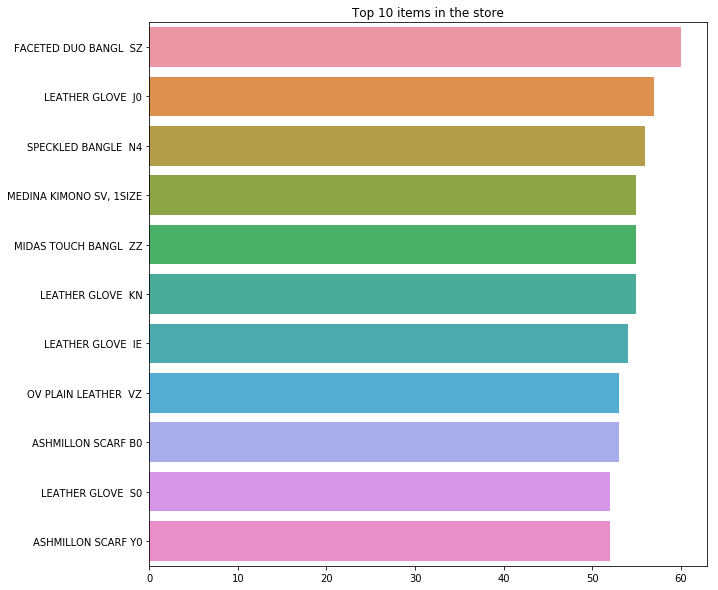

FACETED DUO BANGL  SZ      60
LEATHER GLOVE  J0          57
SPECKLED BANGLE  N4        56
MEDINA KIMONO SV, 1SIZE    55
MIDAS TOUCH BANGL  ZZ      55
LEATHER GLOVE  KN          55
LEATHER GLOVE  IE          54
OV PLAIN LEATHER  VZ       53
ASHMILLON SCARF B0         53
LEATHER GLOVE  S0          52
ASHMILLON SCARF Y0         52
Name: Description, dtype: int64


In [33]:
#Top brands
popularity_counts = purchase_behaviour["Description"].value_counts()
print("There are", popularity_counts.size, "unique items")
#
plt.figure(figsize = (10, 10))
sns.barplot(popularity_counts[0:11].values, popularity_counts[0:11].index)
plt.title("Top 10 items in the store")
plt.show()
print(popularity_counts[0:11])

# Content Based Model : Relationship between the Products

2. In this approach, we analyse the product details,

Here the only information we know about the product is its (Description and its product Category)

So, now we analyse the text description given using NLP, TF-IDF and check how similar two prodcuts are



Note: If we can know more information about the product like( color, size, category, Male/female product etc..) we can do more product analysis

In [34]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
metadata = purchase_behaviour.copy()

In [36]:
metadata.columns

Index(['User Id', 'Date', 'SKU', 'Description', 'Category Description', 'Age'], dtype='object')

In [37]:
#Replace NaN with an empty string
metadata['Description'] = metadata['Description'].fillna('')

In [38]:
tfidf = TfidfVectorizer()

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['Description'].drop_duplicates())

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(80, 115)

In [39]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [40]:
#Construct a reverse map of indices and Product titles
indices = pd.Series(metadata.index, index=metadata['Description']).drop_duplicates()

In [41]:
indices.drop_duplicates

<bound method Series.drop_duplicates of Description
ASHMILLON GLOVE A0, 1SIZE       0
OV PLAIN LEATHER  VZ            1
ASHMILLON GLOVE A0, 1SIZE       2
MIMOSA PRINT BANG  N4           3
PATENT CHARM GLOV  Y4           4
INCA STACKERS  H6               5
ASHMILLON BERET A0, 1SIZE       6
ASHMILLON GLOVE A0, 1SIZE       7
MEDINA KIMONO SV                8
CASHMERE STRIPE F4              9
ANIMAL BANGLE  N4              10
ASHMILLON GLOVE A0, 1SIZE      11
CASHMERE STRIPE A4, 1SIZE      12
ASHMILLON GLOVE A0, 1SIZE      13
MIMOSA PRINT BANG  N4          14
LEATHER GLOVE  SH              15
SIDE BOW GLOVE  Y0             16
ASHMILLON GLOVE A0, 1SIZE      17
OV PLAIN LEATHER  B0           18
ASHMILLON GLOVE A0, 1SIZE      19
MEDINA KIMONO SV, 1SIZE        20
ASHMILLON GLOVE A0, 1SIZE      21
ASHMILLON BERET A0             22
ASHMILLON GLOVE A0, 1SIZE      23
ASHMILLON SCARF B0             24
ASHMILLON SCARF Y0             25
ANIMAL BUCKLE GLO  SH          26
ASHMILLON GLOVE A0, 1SIZE     

In [336]:
# Function that takes in description as input and outputs most similar movies
def get_recommendations(Description, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    full_idx = indices[Description]
    full_idx = list(full_idx)
    distance = len(full_idx)
    idx = full_idx[0]

    # Get the pairwsie similarity scores 
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[0: 11]

    # Get the product indices
    m_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar products
    return metadata['Description'].iloc[m_indices]

Now pass any product as input, it will recommend the similar products according to their description

In [45]:
get_recommendations('FLORAL RING  Y4')

53              FLORAL RING  Y4
37            LEATHER GLOVE  KN
11    ASHMILLON GLOVE A0, 1SIZE
62        ANIMAL BUCKLE GLO  SH
16           SIDE BOW GLOVE  Y0
43           ZIG ZAG BANGLE  J4
12    CASHMERE STRIPE A4, 1SIZE
50    ASHMILLON GLOVE A0, 1SIZE
23    ASHMILLON GLOVE A0, 1SIZE
72    CASHMERE STRIPE A4, 1SIZE
1          OV PLAIN LEATHER  VZ
Name: Description, dtype: object

Above we used only description, now we will use category information also to find how similar two products are

In [46]:
#2
metadata.head(2)

,User Id,Date,SKU,Description,Category Description,Age
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48


In [47]:
metadata['info'] = metadata['Description'] + " " + metadata['Category Description']

In [48]:
metadata.head(2)

,User Id,Date,SKU,Description,Category Description,Age,info
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48,"ASHMILLON GLOVE A0, 1SIZE Handbags & Access"
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48,OV PLAIN LEATHER VZ Handbags & Access


In [49]:
tfidf = TfidfVectorizer()

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['info'].drop_duplicates())

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(80, 118)

In [50]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [337]:
# Function that takes in product title as input and outputs most similar movies
def get_recommendations(Description, cosine_sim=cosine_sim):
    # Get the index of the product that matches
    full_idx = indices[Description]
    full_idx = list(full_idx)
    distance = len(full_idx)
    idx = full_idx[0]

    # Get the pairwsie similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar product
    sim_scores = sim_scores[0: 11]

    # Get the product indices
    m_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['info'].iloc[m_indices]

pass any product as input, it will recommend the similar products according to their description

In [52]:
get_recommendations('FLORAL RING  Y4')

53                      FLORAL RING  Y4 Jewellery
37            LEATHER GLOVE  KN Handbags & Access
11    ASHMILLON GLOVE A0, 1SIZE Handbags & Access
62        ANIMAL BUCKLE GLO  SH Handbags & Access
16           SIDE BOW GLOVE  Y0 Handbags & Access
43                   ZIG ZAG BANGLE  J4 Jewellery
12    CASHMERE STRIPE A4, 1SIZE Handbags & Access
50    ASHMILLON GLOVE A0, 1SIZE Handbags & Access
23    ASHMILLON GLOVE A0, 1SIZE Handbags & Access
72    CASHMERE STRIPE A4, 1SIZE Handbags & Access
1          OV PLAIN LEATHER  VZ Handbags & Access
Name: info, dtype: object

# Colloborative:  Based on the User Profile Information

Here we use all the user information provided,

We have got only age as user information, so we will find how similar two profiles are

In [54]:
purchase_behaviour.shape

(3607, 6)

In [55]:
purchase_behaviour.apply(lambda x : len(x.unique()))

User Id                 1137
Date                     153
SKU                       80
Description               80
Category Description       2
Age                       36
dtype: int64

There 1137 unique users

So the users has purchased more than one product:

In [56]:
purchase_behaviour.head(3)

,User Id,Date,SKU,Description,Category Description,Age
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48
2,26C2EE87,12/2/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,25


In [60]:
purchase_behaviour.describe()

,Age
count,3607.000000
mean,33.303576
std,10.361767
min,20.000000
25%,25.000000
50%,30.000000
75%,42.000000
max,55.000000


In [61]:
userid.head()

,Age,User Id
0,25,CF96A4F
1,49,2A95F376
2,47,2C68D6D0
3,53,286F5573
4,29,2BD8ED61


In [62]:
new_user_data = userid['Age']
new_user_data.index = userid['User Id']

In [63]:
new_user_data.head(2)

User Id
CF96A4F     25
2A95F376    49
Name: Age, dtype: int64

In [109]:
new_user_data.shape

(1199,)

In [143]:
from math import sqrt

#based on user similarity return the users who have similar age

def similarity_score(person1):
    #Finding Euclidean distance 
    d ={}
    for i in new_user_data.index:
        if person1 != i :
            d[i] = sqrt((new_user_data[person1] - new_user_data[i])**2)
    
    sorted_items = sorted(d.items(), key=lambda t: t[1])
    #print (sorted_items[:5])
    #es_list = [x for x,_ in rows]
    return [x for x,_ in sorted_items[:5] ]
                 

Now pass any user as input and check who all are have same personal information

In [147]:
similarity_score("2A95F376")

['328A2253', '4E45B14', '2D774CA4', '8D41203', 'A496029']

This return users based on user profile information:
Here we have only one variable "Age" where user information is given, So we recommend the same products which this user has buied.

The above 5 results are those users who fall into same category.

If we have more user information(like Male/Female, Area Code/Geo Location, Working/Student, Time spent on website) we can gain more insights from  the data.

# Hybrid Model 

In This model we use both user personl data as well as his shopping behavior

We have user personal information as Age and Shopping pattern as his Product description and category.

In [132]:
purchase_behaviour.head()

,User Id,Date,SKU,Description,Category Description,Age
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48
2,26C2EE87,12/2/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,25
3,26C2EE87,12/10/2017,186796,MIMOSA PRINT BANG N4,Jewellery,25
4,26C2EE87,10/28/2017,135119,PATENT CHARM GLOV Y4,Handbags & Access,25


In [133]:
purchase_behaviour.apply(lambda x: len(x.unique()))

User Id                 1137
Date                     153
SKU                       80
Description               80
Category Description       2
Age                       36
dtype: int64

we use unique users and their purchases while forming a pivot table

In [202]:
purchase_pivot = purchase_behaviour.pivot(columns = 'User Id', values = 'SKU').fillna(0)

In [203]:
purchase_pivot.shape

(3607, 1137)

In [204]:
#purchase_pivot

In [205]:
from scipy.sparse import csr_matrix
us_canada_user_rating_matrix = csr_matrix(purchase_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [206]:
query_index =11 # np.random.choice(purchase_pivot.shape[0])
distances, indices = model_knn.kneighbors(purchase_pivot.iloc[query_index, :].reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(purchase_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, purchase_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 11:

1: 12, with distance of 0.0:
2: 2407, with distance of 1.0:
3: 2405, with distance of 1.0:
4: 2408, with distance of 1.0:
5: 2404, with distance of 1.0:


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


Above we can see that the recomendations for 11th User are, 12th, 2407, 2405, 2408, 2004

Now check what is shopping behaviour of 11th user

In [194]:
purchase_behaviour.iloc[11]

User Id                                   69051BA
Date                                   12/20/2017
SKU                                        178394
Description             ASHMILLON GLOVE A0, 1SIZE
Category Description            Handbags & Access
Age                                            28
Name: 11, dtype: object

Now check what are his recommendations

one by one I am showing, using above results we got

In [207]:
purchase_behaviour.iloc[2407]

User Id                           70DAEC3
Date                            8/11/2017
SKU                                215392
Description             ANIMAL BANGLE  N4
Category Description            Jewellery
Age                                    29
Name: 2407, dtype: object

In [210]:
purchase_behaviour.iloc[2405]

User Id                               70DAEC3
Date                                11/2/2017
SKU                                    198742
Description             FACETED DUO BANGL  SZ
Category Description                Jewellery
Age                                        29
Name: 2405, dtype: object

# New Model

I used almost similar approach but chaning format of variables and got similar results as above

In [211]:
new_model_data = purchase_behaviour.drop_duplicates(['User Id', 'Description'])

In [222]:
new_model_data['Description Numeric'] = new_model_data.Description.astype("category").cat.codes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [223]:
new_model_data.head(3)

,User Id,Date,SKU,Description,Category Description,Age,Description Numeric
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48,5
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48,60
2,26C2EE87,12/2/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,25,5


In [224]:
new_pivot = new_model_data.pivot(index = 'SKU', columns = 'User Id', values = 'Description Numeric').fillna(0)

In [225]:
new_pivot_matrix = csr_matrix(new_pivot.values)

from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [226]:
query_index =11 # np.random.choice(purchase_pivot.shape[0])
distances, indices = model_knn.kneighbors(purchase_pivot.iloc[query_index, :].reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(purchase_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, purchase_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 11:

1: 12, with distance of 0.0:
2: 2407, with distance of 1.0:
3: 2405, with distance of 1.0:
4: 2408, with distance of 1.0:
5: 2404, with distance of 1.0:


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


# Forming User cluster groups for recommendations

Conctatinating TF_IDF of product descriptions with User profile(we have Age):
    

In [227]:
v = TfidfVectorizer()
x = v.fit_transform(purchase_behaviour['Description'])
df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())

In [228]:
df1.head()

,1size,a0,a4,an,animal,as,ashmillon,b0,bang,bangl,...,wood,wool,y0,y4,z0,z4,zag,zebra,zig,zz
0,0.493367,0.613686,0.0,0.0,0.0,0.0,0.496948,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.493367,0.613686,0.0,0.0,0.0,0.0,0.496948,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.500136,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.382655,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
df1.shape

(3607, 115)

In [231]:
purchase_tfidf = pd.concat([purchase_behaviour, df1], axis=1)

In [232]:
purchase_tfidf.shape

(3607, 121)

In [233]:
purchase_tfidf.columns

Index(['User Id', 'Date', 'SKU', 'Description', 'Category Description', 'Age',
       '1size', 'a0', 'a4', 'an',
       ...
       'wood', 'wool', 'y0', 'y4', 'z0', 'z4', 'zag', 'zebra', 'zig', 'zz'],
      dtype='object', length=121)

In [239]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()

X = purchase_tfidf.copy()

In [241]:
X.columns

Index(['Date', 'Category Description', 'Age', '1size', 'a0', 'a4', 'an',
       'animal', 'as', 'ashmillon',
       ...
       'wood', 'wool', 'y0', 'y4', 'z0', 'z4', 'zag', 'zebra', 'zig', 'zz'],
      dtype='object', length=118)

In [242]:
#del X['User Id']
#del X['SKU']
#del X['Description']
X['Category Description Labels'] = L.fit_transform(X['Category Description'])
del X['Category Description']

In [249]:
X.columns

Index(['Age', '1size', 'a0', 'a4', 'an', 'animal', 'as', 'ashmillon', 'b0',
       'bang',
       ...
       'wool', 'y0', 'y4', 'z0', 'z4', 'zag', 'zebra', 'zig', 'zz',
       'Category Description Labels'],
      dtype='object', length=117)

In [245]:
del X['Date']

In [248]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=10)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

Based on user profile and product purchase history, we got clusters (we can have any number of clusters)

Whenever new user comes and when his shopping behavior or his Personal Data closely matches with any of the cluster, we recommend the products of that cluster

We need test data, when ever new user comes he falls into any one of the cluster, So that we can recommend the product.

# Conversion rates Browsing to Purchase :

In [258]:
purchase_data = purchase_behaviour.copy()
browse_data = browse_behaviour.copy()

1. Product conversion rates:
    
    Type1: User has browsed some product and bought the same product

In [259]:
purchase_data['ID Product'] = (purchase_data['User Id']).map(str) + " " + (purchase_data['SKU']).map(str)
browse_data['ID Product'] = (browse_data['User Id']).map(str) + " " + (browse_data['SKU']).map(str)

In [260]:
purchase_data.head()

,User Id,Date,SKU,Description,Category Description,Age,ID Product
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48,311DBC84 178394
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48,311DBC84 141740
2,26C2EE87,12/2/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,25,26C2EE87 178394
3,26C2EE87,12/10/2017,186796,MIMOSA PRINT BANG N4,Jewellery,25,26C2EE87 186796
4,26C2EE87,10/28/2017,135119,PATENT CHARM GLOV Y4,Handbags & Access,25,26C2EE87 135119


In [261]:
browse_data.head()

,Date,SKU,Description,Category Description,User Id,Age,ID Product
0,12/24/2017,302445,COLORADO LRG RC NP,Luggage,264BCFBA,20,264BCFBA 302445
1,12/6/2017,303791,SCORPIUS LRG R WL,Luggage,264BCFBA,20,264BCFBA 303791
2,11/16/2017,200573,ZIG ZAG BANGLE J4,Jewellery,264BCFBA,20,264BCFBA 200573
3,12/14/2017,217190,CHARM HEART BGL A4,Jewellery,264BCFBA,20,264BCFBA 217190
4,12/3/2017,302445,COLORADO LRG RC NP,Luggage,423BED3,29,423BED3 302445


In [263]:
purchase_data.shape

(3607, 7)

In [262]:
purchase_data.apply(lambda x: len(x.unique()))

User Id                 1137
Date                     153
SKU                       80
Description               80
Category Description       2
Age                       36
ID Product              3530
dtype: int64

In [266]:
browse_data.shape

(5826, 7)

In [267]:
browse_data.apply(lambda x: len(x.unique()))

Date                      61
SKU                      144
Description              144
Category Description       3
User Id                 1186
Age                       36
ID Product              5728
dtype: int64

In [271]:
product_conversion_rate = pd.merge(purchase_data, browse_data, how='inner', on=['ID Product'])

In [274]:
product_conversion_rate.head()

,User Id_x,Date_x,SKU_x,Description_x,Category Description_x,Age_x,ID Product,Date_y,SKU_y,Description_y,Category Description_y,User Id_y,Age_y
0,A11DAD3,10/11/2017,126412,SIDE BOW GLOVE Y0,Handbags & Access,39,A11DAD3 126412,12/16/2017,126412,SIDE BOW GLOVE Y0,Handbags & Access,A11DAD3,39
1,1813A626,9/13/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,35,1813A626 178394,12/1/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,1813A626,35
2,3782DCC3,12/24/2017,211153,HAMMERED STACKER S4,Jewellery,25,3782DCC3 211153,11/10/2017,211153,HAMMERED STACKER S4,Jewellery,3782DCC3,25
3,1C0D4A72,10/9/2017,155500,LEATHER GLOVE NT,Handbags & Access,55,1C0D4A72 155500,12/10/2017,155500,LEATHER GLOVE NT,Handbags & Access,1C0D4A72,55
4,22A95C72,11/26/2017,167688,CASHMERE STRIPE F4,Handbags & Access,25,22A95C72 167688,12/18/2017,167688,CASHMERE STRIPE F4,Handbags & Access,22A95C72,25


In [273]:
product_conversion_rate.shape

(112, 13)

So, 112 users have browsed the product and purchased the same product

So, these users should not be recommended with already purchased products, Users should be recommended with other similar products based on personilization.

Type2: User Conversion rate: (How many users are browsing the website and also buying some product)

In [280]:
browse_data.columns

Index(['Date', 'SKU', 'Description', 'Category Description', 'User Id', 'Age',
       'ID Product'],
      dtype='object')

In [281]:
purchase_data.columns

Index(['User Id', 'Date', 'SKU', 'Description', 'Category Description', 'Age',
       'ID Product'],
      dtype='object')

In [285]:
purchase_data.shape

(3607, 7)

In [284]:
pd.value_counts(purchase_data['User Id'].isin(browse_data['User Id']))

True     3578
False      29
Name: User Id, dtype: int64

So there are a total of 3578 users who browsed and purchased product from the site:
    
    These users are to be recommended with the products which are not purchased.
    
    So we can use content based recommendation engine

In [334]:
pd.value_counts(browse_data['User Id'].isin(purchase_data['User Id']))

True     5499
False     327
Name: User Id, dtype: int64

327 People didnot purchase

So we can recommend these people, with coupns, More personised model can be recommended.

# Working on Date and Times for Recommendation

In [287]:
browse_data.head()

,Date,SKU,Description,Category Description,User Id,Age,ID Product
0,12/24/2017,302445,COLORADO LRG RC NP,Luggage,264BCFBA,20,264BCFBA 302445
1,12/6/2017,303791,SCORPIUS LRG R WL,Luggage,264BCFBA,20,264BCFBA 303791
2,11/16/2017,200573,ZIG ZAG BANGLE J4,Jewellery,264BCFBA,20,264BCFBA 200573
3,12/14/2017,217190,CHARM HEART BGL A4,Jewellery,264BCFBA,20,264BCFBA 217190
4,12/3/2017,302445,COLORADO LRG RC NP,Luggage,423BED3,29,423BED3 302445


In [309]:
browse_data.shape

(5826, 8)

In [288]:
browse_data['Date']  = pd.to_datetime(browse_data['Date'])

In [289]:
browse_data.head(2)

,Date,SKU,Description,Category Description,User Id,Age,ID Product
0,2017-12-24,302445,COLORADO LRG RC NP,Luggage,264BCFBA,20,264BCFBA 302445
1,2017-12-06,303791,SCORPIUS LRG R WL,Luggage,264BCFBA,20,264BCFBA 303791


Extract Month from the data

In [296]:
browse_data['Month'] = browse_data['Date'].map(lambda x: x.month)

In [298]:
browse_data.head(2)

,Date,SKU,Description,Category Description,User Id,Age,ID Product,Month
0,2017-12-24,302445,COLORADO LRG RC NP,Luggage,264BCFBA,20,264BCFBA 302445,12
1,2017-12-06,303791,SCORPIUS LRG R WL,Luggage,264BCFBA,20,264BCFBA 303791,12


In [300]:
#Now extract month from purchase data

purchase_data['Date'] = pd.to_datetime(purchase_data['Date'])
purchase_data['Month'] = purchase_data['Date'].map(lambda x: x.month)

In [301]:
purchase_data.head(2)

,User Id,Date,SKU,Description,Category Description,Age,ID Product,Month
0,311DBC84,2017-10-11,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48,311DBC84 178394,10
1,311DBC84,2017-11-11,141740,OV PLAIN LEATHER VZ,Handbags & Access,48,311DBC84 141740,11


In [303]:
#Now find the customer behavior for the products which he has purchased for the products he browsed.

#product_conversion_rate.head(2)
product_conversion_rate['Date_x'] = pd.to_datetime(product_conversion_rate['Date_x'])
product_conversion_rate['Date_y'] = pd.to_datetime(product_conversion_rate['Date_y'])

product_conversion_rate['Month_x'] = product_conversion_rate['Date_x'].map(lambda x: x.month)
product_conversion_rate['Month_y'] = product_conversion_rate['Date_y'].map(lambda x: x.month)

In [304]:
product_conversion_rate.head(2)

,User Id_x,Date_x,SKU_x,Description_x,Category Description_x,Age_x,ID Product,Date_y,SKU_y,Description_y,Category Description_y,User Id_y,Age_y,Month_x,Month_y
0,A11DAD3,2017-10-11,126412,SIDE BOW GLOVE Y0,Handbags & Access,39,A11DAD3 126412,2017-12-16,126412,SIDE BOW GLOVE Y0,Handbags & Access,A11DAD3,39,10,12
1,1813A626,2017-09-13,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,35,1813A626 178394,2017-12-01,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,1813A626,35,9,12


It can be clearly seen that customers are browsing in one month and they are purchasing in another month.
So these users can be recommended with the products in the month earlier can increase the sales.

In [305]:
#now find the difference in months on conversation rates

product_conversion_rate['Months Diff'] = product_conversion_rate['Month_y'] - product_conversion_rate['Month_x']

In [306]:
pd.value_counts(product_conversion_rate['Months Diff'])

 2    28
 3    25
 0    22
 1    20
-1    12
 4     5
Name: Months Diff, dtype: int64

So maximum conversation rates are two months old, So these customers can be recommended in early months.

Note: Negative values means,can be customers already buyied product and browsing same afterwards

In [307]:
#Months with most products are browsed:

pd.value_counts(browse_data['Month'])

12    2922
11    2904
Name: Month, dtype: int64

In [308]:
Months
pd.value_counts(purchase_data['Month'])

10    762
12    734
11    728
9     703
8     680
Name: Month, dtype: int64

# More User Personalization

Working more on User personolization and shopping behaviour

Type1:  Users who are more into browsing products

In [312]:
pd.value_counts(browse_behaviour['User Id'])[:20]

172C8B95    15
31553493    14
64C666F     12
1B232CD1    12
2DEFA40B    12
296394F3    12
15B29E82    11
2AB11B64    11
684138A     10
2EF17CC3    10
2BE4E639    10
2535B3C5    10
2C68D6D0    10
13499803    10
25923815    10
74EB484     10
2F2C7788    10
A496029     10
13E26C58    10
2A2C5C67    10
Name: User Id, dtype: int64

These are the users who has browsed most of the times, So these users can be recommended with similar products according to their shopping behavior using the above algorithms.

Type2: Users who bought most of the products

In [314]:
pur_counts = pd.value_counts(purchase_behaviour['User Id'])
pur_counts[:20]

362D796F    9
3EDE744     9
28D41F65    9
395A11D1    8
3B55150D    8
1CFC45FA    8
5199D8C     8
203DF735    8
21B76D04    8
2B820DDD    8
1153B3E1    8
33CAFD26    8
3403ADF5    8
141B0234    8
2E8A648C    7
22EAAE2F    7
30074A6D    7
18F899D3    7
1086AF0F    7
25D999D6    7
Name: User Id, dtype: int64

In [316]:
pur_counts.describe()

count    1137.000000
mean        3.172383
std         1.631073
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: User Id, dtype: float64

75% percent of the users has buyied less than 4 products

so we can divide users based on shopping behaviour

more than 6 purchases : 5 star
    
between 4-5 purchases : 4 star
    
between 3-4 purchases : 3 star
        
between 1-2 purchases : 1 star
    
0 purchases : 0 star


we can use browsing data to change the star rating,

For example, some users may browse less and purchase more, So rating can be changed.

In [317]:
purchase_data['User Freq'] = purchase_data.groupby('User Id')['User Id'].transform('count')

In [318]:
purchase_data.head()

,User Id,Date,SKU,Description,Category Description,Age,ID Product,Month,User Freq
0,311DBC84,2017-10-11,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48,311DBC84 178394,10,2
1,311DBC84,2017-11-11,141740,OV PLAIN LEATHER VZ,Handbags & Access,48,311DBC84 141740,11,2
2,26C2EE87,2017-12-02,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,25,26C2EE87 178394,12,5
3,26C2EE87,2017-12-10,186796,MIMOSA PRINT BANG N4,Jewellery,25,26C2EE87 186796,12,5
4,26C2EE87,2017-10-28,135119,PATENT CHARM GLOV Y4,Handbags & Access,25,26C2EE87 135119,10,5


# Matrix for Purchase History 

In [319]:
purchase_matrix = purchase_behaviour.copy()

In [320]:
purchase_matrix.columns

Index(['User Id', 'Date', 'SKU', 'Description', 'Category Description', 'Age'], dtype='object')

In [321]:
product_pur_matrix = pd.get_dummies(purchase_matrix['Description'])

In [324]:
product_pur_matrix.shape

(3607, 80)

In [325]:
result = pd.concat([purchase_matrix, product_pur_matrix], axis=1, join_axes=[product_pur_matrix.index])

In [326]:
result.shape

(3607, 86)

In [328]:
result.head(5)

,User Id,Date,SKU,Description,Category Description,Age,ANIMAL BANGLE N4,ANIMAL BUCKLE GLO SH,ASHMILLON BERET A0,"ASHMILLON BERET A0, 1SIZE",...,SIDE BOW GLOVE Y0,SPARKLE FLOWER RI Y4,SPARKLE GARDEN RI ZZ,SPECKLE WOOD BANG R8,SPECKLED BANGLE N4,SPICE BANGLE N4,STUDDED BOW GLOVE Y0,WOOD DIP BANGLE W5,ZEBRA BANGLE Y4,ZIG ZAG BANGLE J4
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26C2EE87,12/2/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26C2EE87,12/10/2017,186796,MIMOSA PRINT BANG N4,Jewellery,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26C2EE87,10/28/2017,135119,PATENT CHARM GLOV Y4,Handbags & Access,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [329]:
result['Category Description Labels'] = L.fit_transform(result['Category Description'])
del result['Category Description']
del result['Description']
del result['SKU']
del result['Date']

In [330]:
result.head(2)

,User Id,Age,ANIMAL BANGLE N4,ANIMAL BUCKLE GLO SH,ASHMILLON BERET A0,"ASHMILLON BERET A0, 1SIZE",ASHMILLON GLOVE A0,"ASHMILLON GLOVE A0, 1SIZE",ASHMILLON GLOVE B0,"ASHMILLON GLOVE B0, 1SIZE",...,SPARKLE FLOWER RI Y4,SPARKLE GARDEN RI ZZ,SPECKLE WOOD BANG R8,SPECKLED BANGLE N4,SPICE BANGLE N4,STUDDED BOW GLOVE Y0,WOOD DIP BANGLE W5,ZEBRA BANGLE Y4,ZIG ZAG BANGLE J4,Category Description Labels
0,311DBC84,48,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,311DBC84,48,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


form cluster groups based on prodcuts purchased

In [331]:
del result['User Id']

In [332]:
X = result

In [333]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=10)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

We have formed cluster groups, so when ever new user comes and shops for any products, we will look into the MATRIX and calculate the nearest neighbours using KNN and find the items in that clusters